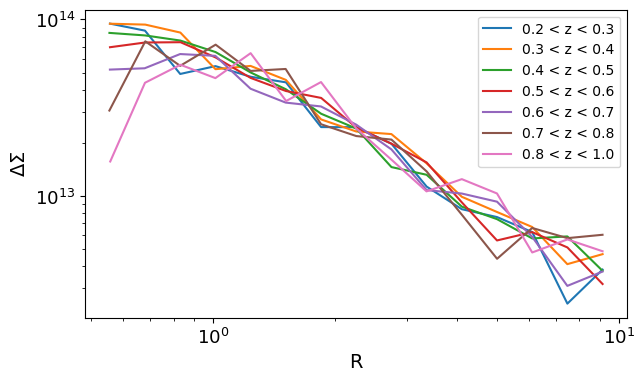

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
data_true = np.load(f'../data/stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles_true = data_true['stacked profile']
z = data_true['stacked profile']['z_mean']
for z_bin in analysis.Z_bin:
    mask = (z > z_bin[0])*(z < z_bin[1])
    r = np.mean(profiles_true['radius'][mask], axis=0)
    ds = np.mean(profiles_true['gt'][mask], axis=0)
    plt.loglog(r, ds, label=f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}')
plt.xscale('log')
plt.ylabel(r'$\Delta\Sigma$', fontsize=14)
plt.xlabel('R', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which="both", labelsize= 13)
plt.savefig('../fig/stacked_redmapper_profiles_attenuation.png', bbox_inches='tight', dpi=100)

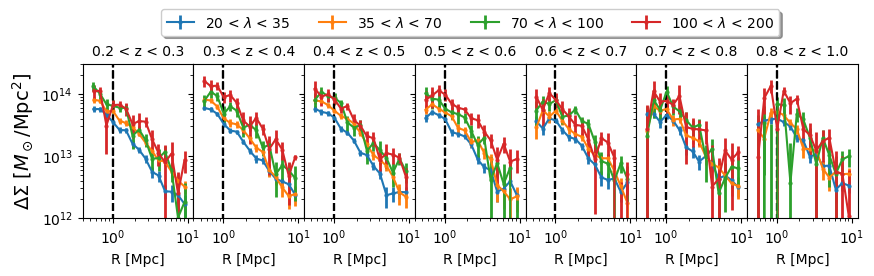

In [71]:
data = np.load(f'../data/stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,len(Z_bin), figsize = (10,2))
fig.subplots_adjust(wspace=0, hspace=0)
for i, z_bin in enumerate(Z_bin):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['gt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(1e12, 3e14)
            axs[i].set_xlim(0.4, 12)
            axs[i].set_xscale('log')
            axs[i].set_yscale('log')
            axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel('R [Mpc]', fontsize = 10)
            axs[i].set_title(label_z, fontsize = 10)
            axs[0].set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=14)
        #except: a=1
        
plt.legend(loc='upper center', bbox_to_anchor=(-2.5, 1.4),
          ncol=4, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('../fig/stacked_redmapper_profiles.png', bbox_inches='tight', dpi=100)

In [14]:
import pickle
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
table_redmapper = load('../data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')
N_obs, proxy_edges, z_edges = np.histogram2d(table_redmapper['redshift'], 
                                                        table_redmapper['richness'],
                                                   bins=[analysis.z_corner, analysis.rich_corner])

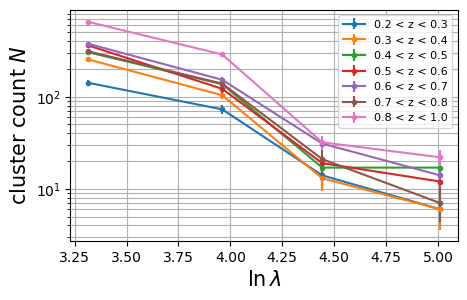

In [66]:
plt.figure(figsize=(5,3))
color = ['C0','C1','C2','C3','C4','C5']
for i, z_bin in enumerate(Z_bin):
    z0 = z_bin[0]
    z1 = z_bin[1]
    label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
    #plt.stairs( N_obs.T[:,i], analysis.rich_corner, color = color[i])
    plt.errorbar(np.log(np.mean(Obs_bin, axis=1)), N_obs.T[:,i],  N_obs.T[:,i]**.5, 
                 marker = '.',  fmt='-', label = label_z)
plt.xlabel(r'$\ln \lambda$', fontsize=15)
plt.ylabel(r'cluster count $N$', fontsize=15)
plt.legend(fontsize=8)
plt.grid(which='both')
plt.yscale('log')
plt.savefig('../fig/cluster_count.png', bbox_inches='tight', dpi=100)